### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Set visual style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('twitter_training.csv', header=None)

# Preview the first few rows
df.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Step 2: Rename Columns for clarity

In [2]:
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

# Basic shape and info
print("🧾 Dataset Shape:", df.shape)
print("\n🧠 Column Data Types:\n")
print(df.dtypes)

# Check for missing values
print("\n❓ Missing Values:\n")
print(df.isnull().sum())

# Preview after renaming
df.head()


🧾 Dataset Shape: (74682, 4)

🧠 Column Data Types:

ID            int64
Entity       object
Sentiment    object
Tweet        object
dtype: object

❓ Missing Values:

ID             0
Entity         0
Sentiment      0
Tweet        686
dtype: int64


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Step 3: Clean null tweets

C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\4203892548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')
C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\4203892548.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


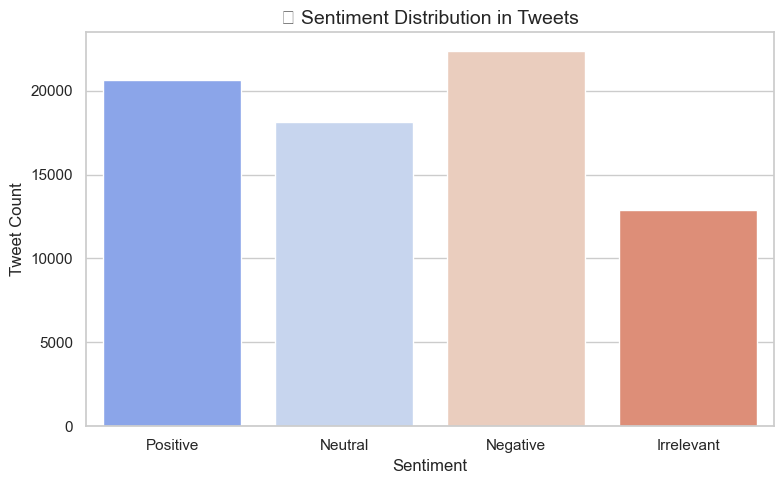

In [3]:
df = df.dropna(subset=['Tweet'])

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')

plt.title("📊 Sentiment Distribution in Tweets", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()


### Step 4: WordClouds for Positive, Negative, and Neutral Tweets

C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\3219365974.py:14: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\3219365974.py:14: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


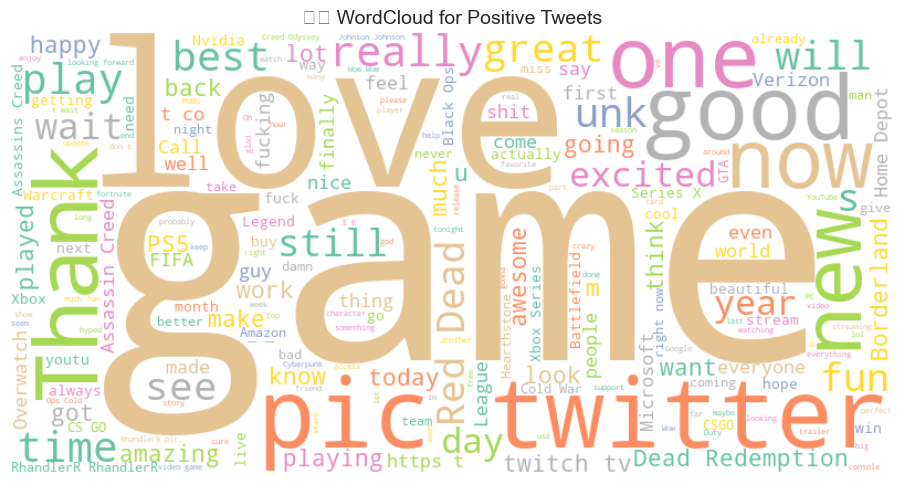

C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\3219365974.py:14: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\3219365974.py:14: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


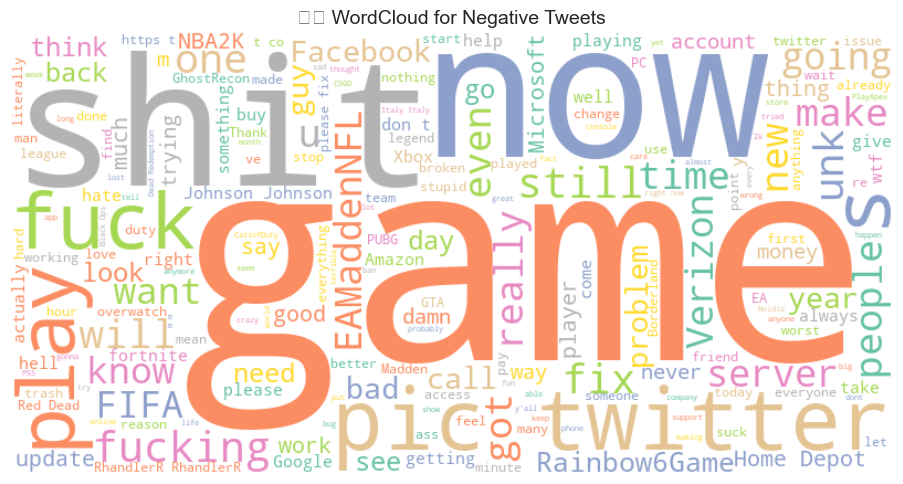

C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\3219365974.py:14: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\AppData\Local\Temp\ipykernel_12028\3219365974.py:14: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


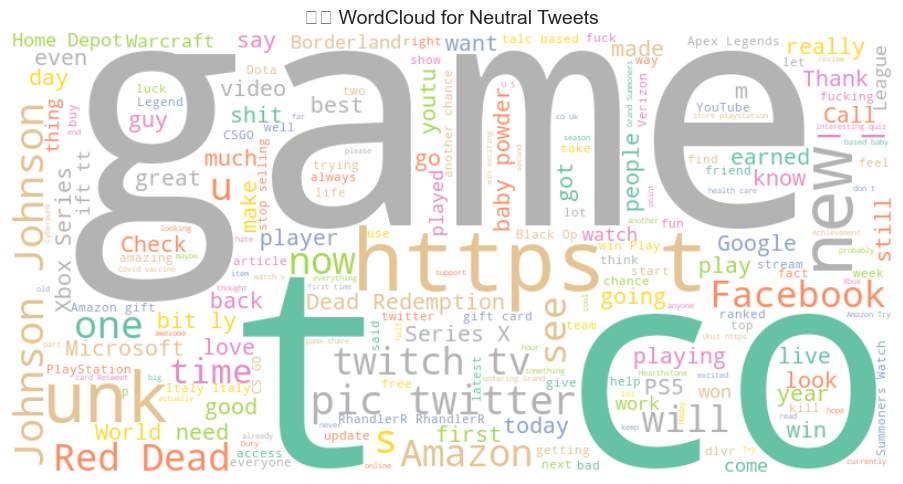

In [4]:
# Set up a function to generate word clouds
def generate_wordcloud(data, sentiment_label):
    text = ' '.join(data[data['Sentiment'] == sentiment_label]['Tweet'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"☁️ WordCloud for {sentiment_label} Tweets", fontsize=14)
    plt.tight_layout()
    plt.show()

# WordCloud for Positive
generate_wordcloud(df, 'Positive')

# WordCloud for Negative
generate_wordcloud(df, 'Negative')

# WordCloud for Neutral
generate_wordcloud(df, 'Neutral')
